In [5]:
from sandbox.toolbox.models import ResNet112, ResNet56, ResNet20, ResNetBaby
from sandbox.toolbox.data_loader import Cifar10, Cifar100
from sandbox.toolbox.utils import get_names, plot_the_things, evaluate_model, get_settings

import torch
import matplotlib.pyplot as plt
import numpy as np

device = 'cuda'

In [ ]:
Epochs = 150
Data = Cifar100() 
Model = ResNet112(Data.class_num).to(device) 

trainloader, testloader = Data.trainloader, Data.testloader
checkpoint = torch.load(f'models/{Data.name}_{Model.model_type}.pth', weights_only=True)
Model.load_state_dict(checkpoint['weights']) 
evaluate_model(Model, testloader)
Model.eval()

Files already downloaded and verified
Files already downloaded and verified
Total parameters for ResNet112: 1,736,564
TEST | Loss: 1.128 | Acc: 73.850 |
(1.1276416144793546, 73.85)


In [ ]:
iterdata = iter(trainloader)

In [315]:
inputs, targets = next(iterdata)
inputs, targets = inputs.to(device), targets.to(device)

with torch.no_grad():
    outputs = Model(inputs)
    probs = torch.nn.functional.softmax(outputs[3], dim=1)
confidence, predicted = torch.max(probs.data, 1)
correct = predicted.eq(targets.data).cpu().sum().float().item()


# predicted_class = trainloader.dataset.classes[predicted.data]
# correct_class = trainloader.dataset.classes[targets.data]
# print(f'{"Success" if correct == 1.0 else "Fail"}: {predicted_class=}, {correct_class=}, confidence: {confidence.item()*100:.2f}')

# plt.imshow(outputs[2][0,1].cpu(),cmap='gray')

feature_map = outputs[2]
print(f'{feature_map.shape=}')

feature_map.shape=torch.Size([128, 64, 8, 8])


In [317]:
feature_map = torch.randn(1, 64, 8, 8)

Coefficient of Variation
Coefficient of variation -0.02
Kurtosis: -0.0293
Entropy 8.281549453735352


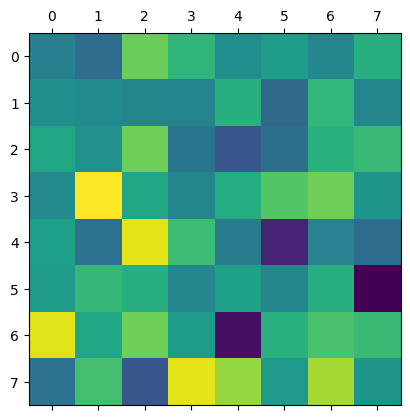

In [318]:
print("Coefficient of Variation")
mean = torch.mean(feature_map)
std = torch.std(feature_map)
cv = mean / (std.abs() + 1e-10)
print('Coefficient of variation', f'{cv.item():.2f}')

from scipy.stats import kurtosis
flat_fm = feature_map.flatten().detach().cpu().numpy()
kurt = kurtosis(flat_fm)
print(f"Kurtosis: {kurt:.4f}")



def compute_entropy(feature_map):
    feature_map = feature_map - feature_map.min()  # Shift to make all values >= 0
    if feature_map.sum() == 0:  # Avoid division by zero
        return torch.tensor(0.0)
    probs = feature_map / feature_map.sum()  # Sum normalizes to 1
    entropy = -torch.sum(probs * torch.log(probs + 1e-10))
    return entropy

print('Entropy', compute_entropy(feature_map).item())
plt.matshow(feature_map[0,0].cpu())